#### Project 3 Notebook:

This notebook outlines the process and methodologies used to predict drug interactions from the chemical properties. I used the ChEMBL database to gather the data.

ChemEMBL Website: 
https://www.ebi.ac.uk/chembl/

Description of features and tables:
http://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_23/schema_documentation.html

Database schema:
http://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_23/chembl_23_schema.png

Website to download data:
http://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_27/


In [377]:
# Import Python-PostgreSQL database.
import psycopg2 as pg
import pandas as pd

In [378]:
# data from chemembl was downloaded from website and dumped into local database called
# chembl_27.


# Postgres info to connect
connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'chembl_27',    # DB that we are connecting to
    'port': 5432          # port we opened on AWS
}

connection = pg.connect(**connection_args)  # What is that "**" there??

In [379]:
# simple SQL query to check if we are able to access the database.

query = "SELECT * FROM drug_mechanism;"

df = pd.read_sql(query, connection)
df.shape

(5134, 13)

In [8]:
# check null values for df.

total_nulls=df.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
site_id                 4942
selectivity_comment     4859
binding_site_comment    4851
mechanism_comment       3442
action_type              259
tid                      259
mechanism_of_action       18
disease_efficacy           0
molecular_mechanism        0
direct_interaction         0
molregno                   0
record_id                  0
mec_id                     0
dtype: int64


### DATA SET AGGREGATION

Here we link the drug_mechanism table to the compound_properties table. The drug_mechanism table contains the feature for drug_interaction. This number is 1 if a drug interaction between the target site exists, or else 0 if there is no drug interaction, or if an interaction is not known to exist. We join these tables on the molregno feature, which is a primary key for the compound_properties dataset. 

In [64]:
#### The query to link the drug_mechanism table to the compound_properties table.

query5 = """
SELECT 
  b.molregno,
  
  b.mw_freebase,
  b.alogp,
  b.rtb,
  b.num_ro5_violations,
--  b.cx_most_apka,
--  b.cx_most_bpka,
  b.cx_logp,
  b.cx_logd,
  b.full_mwt,
  b.aromatic_rings,
  b.heavy_atoms,
  b.qed_weighted,
  b.mw_monoisotopic,
  b.hba_lipinski,
  b.hbd_lipinski,
  b.num_lipinski_ro5_violations,
  
  
  b.hba,
  b.hbd,
  b.psa,
--  a.tid,
--  a.mec_id, 
  a.direct_interaction

  

FROM drug_mechanism a
FULL OUTER JOIN  compound_properties b
on a.molregno = b.molregno


GROUP BY
  b.molregno,
  
  b.mw_freebase,
  b.alogp,
  b.rtb,
  b.num_ro5_violations,
--  b.cx_most_apka,
--  b.cx_most_bpka,
  b.cx_logp,
  b.cx_logd,
  b.full_mwt,
  b.aromatic_rings,
  b.heavy_atoms,
  b.qed_weighted,
  b.mw_monoisotopic,
  b.hba_lipinski,
  b.hbd_lipinski,
  b.num_lipinski_ro5_violations,
  
  
  
  
  b.hba,
  b.hbd,
  b.psa,
--  a.tid,
--  a.mec_id, 
  a.direct_interaction

        """

df5 = pd.read_sql(query5, connection)


In [119]:
# print the head df5. 
df5.head()

,molregno,mw_freebase,alogp,rtb,num_ro5_violations,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,hba,hbd,psa,direct_interaction
0,12464.0,496.59,4.87,6.0,0.0,5.22,5.11,496.59,4.0,36.0,0.29,496.1569,7.0,2.0,0.0,6.0,2.0,87.32,NaN
1,4221.0,326.48,5.69,8.0,1.0,6.07,6.07,326.48,2.0,24.0,0.68,326.2246,2.0,1.0,1.0,2.0,1.0,29.46,NaN
2,8684.0,241.22,0.38,2.0,0.0,0.43,0.43,241.22,2.0,16.0,0.77,241.0045,6.0,2.0,0.0,5.0,1.0,99.60,NaN
3,16977.0,233.35,2.98,5.0,0.0,2.93,0.85,233.35,1.0,17.0,0.84,233.1780,2.0,1.0,0.0,2.0,1.0,23.47,NaN
4,16254.0,347.54,6.15,15.0,1.0,6.38,6.38,347.54,0.0,25.0,0.20,347.2824,3.0,0.0,1.0,2.0,0.0,29.54,NaN


In [120]:
# check null values
total_nulls=df5.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
direct_interaction             1942077
cx_logp                          49678
cx_logd                          49678
psa                              49458
alogp                            49458
rtb                              49458
num_ro5_violations               49458
aromatic_rings                   49458
heavy_atoms                      49458
qed_weighted                     49458
hba_lipinski                     49458
hbd_lipinski                     49458
num_lipinski_ro5_violations      49458
hba                              49458
hbd                              49458
mw_monoisotopic                     14
mw_freebase                         14
full_mwt                             1
molregno                             1
dtype: int64


In [121]:
# check size of df5
df5.shape

(1944927, 19)

In [122]:
# copy df5 into another table called updated_df5
updated_df5 = df5.copy()

In [126]:
# remove 'psa' values that are null and place them into a table called chem_inter.
# by removing null psa values, we rid most of the null values from the other tables. 

chem_inter = updated_df5[updated_df5['psa'].notna()]

In [127]:
# check for null values in the dataset. 

total_nulls = chem_inter.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
direct_interaction             1892785
cx_logp                            220
cx_logd                            220
aromatic_rings                       0
mw_freebase                          0
alogp                                0
rtb                                  0
num_ro5_violations                   0
full_mwt                             0
heavy_atoms                          0
psa                                  0
qed_weighted                         0
mw_monoisotopic                      0
hba_lipinski                         0
hbd_lipinski                         0
num_lipinski_ro5_violations          0
hba                                  0
hbd                                  0
molregno                             0
dtype: int64


In [128]:
# replace null values for direct_interaction with 0. 

chem_inter.direct_interaction.fillna(0, inplace=True)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [129]:
# check null values

total_nulls = chem_inter.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
cx_logp                        220
cx_logd                        220
direct_interaction               0
aromatic_rings                   0
mw_freebase                      0
alogp                            0
rtb                              0
num_ro5_violations               0
full_mwt                         0
heavy_atoms                      0
psa                              0
qed_weighted                     0
mw_monoisotopic                  0
hba_lipinski                     0
hbd_lipinski                     0
num_lipinski_ro5_violations      0
hba                              0
hbd                              0
molregno                         0
dtype: int64


### IMPUTE MISSING DATA USING SIMPLEIMPUTER MEAN FUNCTION

In [130]:
#impute missing values for cx_logp and cx_logd
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

In [131]:
imp_mean_cx_logp = imp_mean.fit(chem_inter[['cx_logp']])
imp_mean_cx_logd = imp_mean.fit(chem_inter[['cx_logd']])

In [132]:
chem_inter['cx_logp'] = imp_mean_cx_logp.transform(chem_inter[['cx_logp']])
chem_inter['cx_logd'] = imp_mean_cx_logd.transform(chem_inter[['cx_logd']])

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
# check null values

total_nulls=chem_inter.isnull().sum().sort_values(ascending=False)
print("Total number of nulls for each feature:")
print(total_nulls)

Total number of nulls for each feature:
direct_interaction             0
aromatic_rings                 0
mw_freebase                    0
alogp                          0
rtb                            0
num_ro5_violations             0
cx_logp                        0
cx_logd                        0
full_mwt                       0
heavy_atoms                    0
psa                            0
qed_weighted                   0
mw_monoisotopic                0
hba_lipinski                   0
hbd_lipinski                   0
num_lipinski_ro5_violations    0
hba                            0
hbd                            0
molregno                       0
dtype: int64


In [134]:
chem_inter.head()

,molregno,mw_freebase,alogp,rtb,num_ro5_violations,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,hba,hbd,psa,direct_interaction
0,12464.0,496.59,4.87,6.0,0.0,5.22,5.11,496.59,4.0,36.0,0.29,496.1569,7.0,2.0,0.0,6.0,2.0,87.32,0.0
1,4221.0,326.48,5.69,8.0,1.0,6.07,6.07,326.48,2.0,24.0,0.68,326.2246,2.0,1.0,1.0,2.0,1.0,29.46,0.0
2,8684.0,241.22,0.38,2.0,0.0,0.43,0.43,241.22,2.0,16.0,0.77,241.0045,6.0,2.0,0.0,5.0,1.0,99.60,0.0
3,16977.0,233.35,2.98,5.0,0.0,2.93,0.85,233.35,1.0,17.0,0.84,233.1780,2.0,1.0,0.0,2.0,1.0,23.47,0.0
4,16254.0,347.54,6.15,15.0,1.0,6.38,6.38,347.54,0.0,25.0,0.20,347.2824,3.0,0.0,1.0,2.0,0.0,29.54,0.0


In [135]:
#chem_inter.hba_lipinski.unique()

In [136]:
#convert float numbers to int for some features.
chem_inter['molregno'] = chem_inter.molregno.astype('int')
chem_inter['rtb'] = chem_inter.rtb.astype('int')
chem_inter['num_ro5_violations'] = chem_inter.num_ro5_violations.astype('int')
chem_inter['aromatic_rings'] = chem_inter.aromatic_rings.astype('int')
chem_inter['heavy_atoms'] = chem_inter.heavy_atoms.astype('int')
chem_inter['hba_lipinski'] = chem_inter.hba_lipinski.astype('int')
chem_inter['hbd_lipinski'] = chem_inter.hbd_lipinski.astype('int')
chem_inter['num_lipinski_ro5_violations'] = chem_inter.num_lipinski_ro5_violations.astype('int')

chem_inter['hba'] = chem_inter.hba.astype('int')
chem_inter['hbd'] = chem_inter.hbd.astype('int')

chem_inter['direct_interaction'] = chem_inter.direct_interaction.astype('int')


/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [137]:
chem_inter.head()

,molregno,mw_freebase,alogp,rtb,num_ro5_violations,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,hba,hbd,psa,direct_interaction
0,12464,496.59,4.87,6,0,5.22,5.11,496.59,4,36,0.29,496.1569,7,2,0,6,2,87.32,0
1,4221,326.48,5.69,8,1,6.07,6.07,326.48,2,24,0.68,326.2246,2,1,1,2,1,29.46,0
2,8684,241.22,0.38,2,0,0.43,0.43,241.22,2,16,0.77,241.0045,6,2,0,5,1,99.60,0
3,16977,233.35,2.98,5,0,2.93,0.85,233.35,1,17,0.84,233.1780,2,1,0,2,1,23.47,0
4,16254,347.54,6.15,15,1,6.38,6.38,347.54,0,25,0.20,347.2824,3,0,1,2,0,29.54,0


In [372]:
chem_inter.aromatic_rings.unique()

array([ 4,  2,  1,  0,  3,  7,  5,  6,  8, 16,  9, 10, 13, 19, 12, 11, 14,
       17, 20, 26, 21, 30])

In [138]:
#class imbalance
chem_inter['direct_interaction'].value_counts()

0    1892785
1       2684
Name: direct_interaction, dtype: int64

In [374]:
2684/(1892785+2684)

0.0014160083863149436

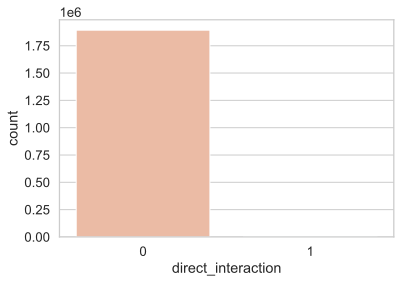

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x=chem_inter['direct_interaction'], data=chem_inter, palette='RdBu')
#plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [352]:
#output chem_inter as csv on desktop
chem_inter.to_csv('/Users/gunnuparinandi/Desktop/chem_inter.csv')

#### LOGISTIC REGRESSION FIRST PASS

In [139]:
X = chem_inter.drop(['molregno','direct_interaction'],axis=1)

In [141]:
y = chem_inter['direct_interaction']

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [205]:
# 20% for testing!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [206]:
lm1 = LogisticRegression()

In [207]:
lm1.fit(X_train, y_train)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [208]:
lm1.score(X_train, y_train)

0.9985781881130986

In [209]:
lm1.score(X_test, y_test)

0.9984832257962405

In [151]:
prediction_hard = lm1.predict(X_train)

In [152]:
confusion_matrix(y_train, prediction_hard)

array([[1514210,      45],
       [   2111,       9]])

Confusion Matrix shows us that Imbalance caused most of the molecules to predict as having no interaction with the target site. We have to adjust for this using random sampling from the '0' class.

From class-imbalance notebook

#### undersample majority class (0) to equal minority class (1)

In [154]:
# Import the usual suspects. Any new functions will be introduced individually for clarity.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg'

In [156]:
#under sampling from imblearn:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(X,y)

In [157]:
Counter(y_under)

Counter({0: 2684, 1: 2684})

Join X_under and y_under as one dataframe

In [367]:
result = pd.concat([X_under, y_under], axis=1, join='outer')

In [371]:
#output result as csv on desktop
result.to_csv('/Users/gunnuparinandi/Desktop/result.csv')

In [182]:
# 20% for testing!
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state=42)

In [183]:
lm2 = LogisticRegression()

In [184]:
lm2.fit(X_train_under, y_train_under)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [351]:
#LOG REGRESSION THAT GIVE FEATURES!
list(zip(X_train_under.columns,lm2.coef_[0]))

[('mw_freebase', -0.026695187785359103),
 ('alogp', 0.048515669626317696),
 ('rtb', -0.06955917392879142),
 ('num_ro5_violations', 0.03159901570964491),
 ('cx_logp', 0.1574148572168554),
 ('cx_logd', -0.17504324132242507),
 ('full_mwt', 0.02008867292660741),
 ('aromatic_rings', -0.33378876886816067),
 ('heavy_atoms', -0.004555477716087962),
 ('qed_weighted', 0.007440518069917421),
 ('mw_monoisotopic', 0.008029815238763212),
 ('hba_lipinski', -0.13612136245445014),
 ('hbd_lipinski', 0.13294926715933642),
 ('num_lipinski_ro5_violations', 0.01614916178049193),
 ('hba', 0.15789845507193753),
 ('hbd', 0.04146681736868846),
 ('psa', -0.0020202691559568597)]

In [185]:
lm2.score(X_train_under, y_train_under)

0.6807172799254774

In [186]:
lm2.score(X_test_under, y_test_under)

0.6880819366852886

In [188]:
prediction_hard_under = lm2.predict(X_train_under)

In [189]:
confusion_matrix(y_train_under, prediction_hard)

array([[1667,  470],
       [ 901, 1256]])

classification_error_metrics_student

In [214]:
y_predict = lm2.predict(X_test_under)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test_under, y_predict), 
                                                     recall_score(y_test_under, y_predict)))

Default threshold:
Precision: 0.7124,   Recall: 0.6110


In [221]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test_under, lm2.predict_proba(X_test_under)[:,1])

ROC AUC score =  0.7284550194436447


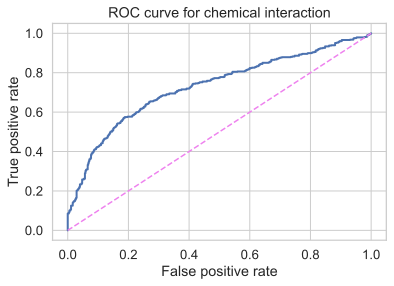

In [227]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for chemical interaction');
print("ROC AUC score = ", roc_auc_score(y_test_under, lm2.predict_proba(X_test_under)[:,1]))

#Best classifier has ROC AUC score of 1.

Log-Loss

In [229]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test_under, lm2.predict_proba(X_test_under))))

Log-loss on logit: 0.6067


In [230]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train_under, y_train_under)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test_under, dc.predict_proba(X_test_under))))

Log-loss on dummy classifier: 17.5267


/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [231]:
print("Logistic accuracy: {:6.4f}".format(lm2.score(X_test_under, y_test_under)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test_under, y_test_under)))

Logistic accuracy: 0.6881
Dummy accuracy: 0.5261


In [332]:
X_train_under.columns

Index(['mw_freebase', 'alogp', 'rtb', 'num_ro5_violations', 'cx_logp',
       'cx_logd', 'full_mwt', 'aromatic_rings', 'heavy_atoms', 'qed_weighted',
       'mw_monoisotopic', 'hba_lipinski', 'hbd_lipinski',
       'num_lipinski_ro5_violations', 'hba', 'hbd', 'psa'],
      dtype='object')

### holdout sets

Exercise: using train_test_split and random state 3, further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
Hint: you will need to adjust the test_size parameter.

In [324]:
# hold out 20% of the data for final testing
#X,y are 80% of the data.
X, X_test, y, y_test = train_test_split(X_under, y_under, test_size=.2, random_state=10)

In [325]:
# YOUR SOLUTION HERE
#X_train, y_train are 60% of the data
#X_val, y_val are 20% of the data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

In [326]:
#set up the 3 models we're choosing from:
# Andrew....don't do .values!


lg = LogisticRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [329]:
#validate

lg.fit(X_train, y_train)
print(f'Logistic Regression val R^2: {lg.score(X_val, y_val):.3f}')

lg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lg.score(X_val_scaled, y_val):.3f}')

#lg.fit(X_train_poly, y_train)
#print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Logistic Regression val R^2: 0.703
Ridge Regression val R^2: 0.695


/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [330]:
lg.fit(X_test, y_test)
print(f'Logistic Regression val R^2: {lg.score(X_val, y_val):.3f}')



Logistic Regression val R^2: 0.688


/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### XGB with original dataset

Class imbalance is upsetting final output

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [211]:
clf = XGBClassifier().fit(X_train, y_train)

In [212]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 4)*100}')

Model Accuracy: 99.86


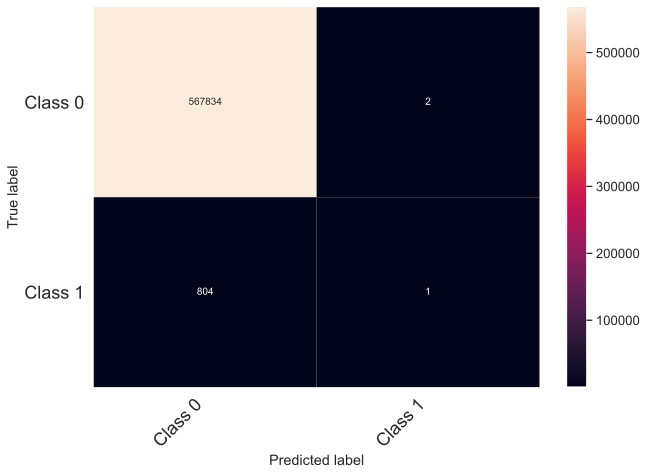

In [213]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

#### ADASYN

In [190]:
## Code goes here ##
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X,y)

In [191]:
# 20% for testing!
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size = 0.2, random_state=42)

In [195]:
Counter(y_adasyn)

Counter({0: 1892785, 1: 1891806})

In [193]:
lm3 = LogisticRegression()

In [194]:
lm3.fit(X_train_adasyn, y_train_adasyn)

/Users/gunnuparinandi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [197]:
lm3.score(X_train_adasyn, y_train_adasyn)

0.7521613966109936

In [198]:
lm3.score(X_test_adasyn, y_test_adasyn)

0.7523380969430018

In [201]:
prediction_hard_adasyn = lm3.predict(X_train_adasyn)

In [202]:
confusion_matrix(y_train_adasyn, prediction_hard_adasyn)

array([[1162076,  351999],
       [ 398375, 1115222]])

#### Random Forest Classifer --WRONG!

In [250]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
clf = RandomForestClassifier(n_estimators=10000)

In [252]:
clf.fit(X_train_under, y_train_under)

RandomForestClassifier(n_estimators=10000)

In [253]:
clf.score(X_train_under, y_train_under)

0.9993013507219376

In [254]:
clf.score(X_test_under, y_test_under)

0.7178770949720671

In [247]:
prediction = clf.predict(X_test_under)

In [248]:
accuracy_score(y_test_under,prediction)

0.7178770949720671

In [249]:
clf.feature_importances_

array([0.07423909, 0.08212565, 0.05477661, 0.00561333, 0.08421348,
       0.10417756, 0.09897276, 0.0523622 , 0.05239538, 0.07490981,
       0.0756011 , 0.04254818, 0.03110044, 0.00566556, 0.0457572 ,
       0.02606204, 0.08947962])

In [256]:
features = ['mw_freebase', 'alogp', 'rtb', 'num_ro5_violations', 'cx_logp',
       'cx_logd', 'full_mwt', 'aromatic_rings', 'heavy_atoms', 'qed_weighted',
       'mw_monoisotopic', 'hba_lipinski', 'hbd_lipinski',
       'num_lipinski_ro5_violations', 'hba', 'hbd', 'psa']

In [257]:
# Print the name and gini importance of each feature
for feature in zip(features, clf.feature_importances_):
    print(feature)

('mw_freebase', 0.0757771296117765)
('alogp', 0.08227386265584322)
('rtb', 0.05521576257126209)
('num_ro5_violations', 0.005674445866501778)
('cx_logp', 0.08272093763711916)
('cx_logd', 0.10620568283467942)
('full_mwt', 0.09923911602062929)
('aromatic_rings', 0.05266317087405663)
('heavy_atoms', 0.05321320247773968)
('qed_weighted', 0.07519563330221718)
('mw_monoisotopic', 0.076342528895522)
('hba_lipinski', 0.04045580120170728)
('hbd_lipinski', 0.03032953168282155)
('num_lipinski_ro5_violations', 0.0062030382057349145)
('hba', 0.04431821227668678)
('hbd', 0.026389200595312697)
('psa', 0.08778274329038978)


In [264]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train_under, y_train_under)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000),
                threshold=0.15)

In [265]:
# Print the names of the most important features
for features in sfm.get_support(indices=True):
    print(features)

#### Random Forest Classifier Take 2 !!!!!!

In [313]:
df5.head()

,molregno,mw_freebase,alogp,rtb,num_ro5_violations,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,hba,hbd,psa,direct_interaction
0,12464.0,496.59,4.87,6.0,0.0,5.22,5.11,496.59,4.0,36.0,0.29,496.1569,7.0,2.0,0.0,6.0,2.0,87.32,NaN
1,4221.0,326.48,5.69,8.0,1.0,6.07,6.07,326.48,2.0,24.0,0.68,326.2246,2.0,1.0,1.0,2.0,1.0,29.46,NaN
2,8684.0,241.22,0.38,2.0,0.0,0.43,0.43,241.22,2.0,16.0,0.77,241.0045,6.0,2.0,0.0,5.0,1.0,99.60,NaN
3,16977.0,233.35,2.98,5.0,0.0,2.93,0.85,233.35,1.0,17.0,0.84,233.1780,2.0,1.0,0.0,2.0,1.0,23.47,NaN
4,16254.0,347.54,6.15,15.0,1.0,6.38,6.38,347.54,0.0,25.0,0.20,347.2824,3.0,0.0,1.0,2.0,0.0,29.54,NaN


In [314]:
df5.dtypes

molregno                       float64
mw_freebase                    float64
alogp                          float64
rtb                            float64
num_ro5_violations             float64
cx_logp                        float64
cx_logd                        float64
full_mwt                       float64
aromatic_rings                 float64
heavy_atoms                    float64
qed_weighted                   float64
mw_monoisotopic                float64
hba_lipinski                   float64
hbd_lipinski                   float64
num_lipinski_ro5_violations    float64
hba                            float64
hbd                            float64
psa                            float64
direct_interaction             float64
dtype: object

In [315]:
rf_data = df5.copy()

In [316]:
X_rf = rf_data.drop(['molregno','direct_interaction'],axis=1)

In [317]:
y_rf = rf_data['direct_interaction']

In [318]:
# 20% for testing!
seed=50
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.33, random_state=seed)

In [319]:
clf_rf = RandomForestClassifier()

In [320]:
X_train_rf.head()

,mw_freebase,alogp,rtb,num_ro5_violations,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,hba,hbd,psa
1180815,441.45,4.64,6.0,0.0,4.84,4.84,441.45,3.0,32.0,0.59,441.1552,4.0,2.0,0.0,3.0,2.0,58.56
262023,418.50,6.54,4.0,1.0,7.30,6.29,418.50,4.0,30.0,0.17,418.1264,5.0,1.0,1.0,4.0,2.0,62.24
1835049,273.26,1.06,1.0,0.0,1.57,1.45,273.26,1.0,19.0,0.77,273.1201,5.0,0.0,0.0,5.0,0.0,48.09
812698,442.56,3.07,5.0,0.0,3.81,3.81,442.56,1.0,32.0,0.66,442.2468,7.0,0.0,0.0,5.0,0.0,76.15
774591,216.24,1.43,2.0,0.0,1.64,1.26,216.24,1.0,16.0,0.58,216.0899,4.0,2.0,0.0,2.0,2.0,58.20


In [375]:
#clf_rf.fit(X_train_rf,y_train_rf)

In [321]:
from xgboost import XGBClassifier

In [376]:
# fit model no training data
#model = XGBClassifier()
#model.fit(X_train_rf, y_train_rf)